In [72]:
import numpy as np
import os 
import matplotlib.pyplot as plt
from solar.database.tables import Visual_File
from aggregation import Aggregator, get_subject_image
from aggregation import json_import_list, json_export_list

path_old='/Users/pjol/SolarJets-1/BoxTheJets/'
os.chdir(path_old)
subjects,date,end_date,ans,agreement,subject_file, subject_sol=np.loadtxt('../subjects_{}.csv'.format('Tc'),delimiter=',',unpack=True,dtype=str)
date=np.array(date,dtype='datetime64')
subjects=subjects.astype(int)
agreement=agreement.astype(float)
#Loading in the properties
#file_path='exports/Jet_clusters_3.0_2.0_dbscan_0.6_cluster3.csv'
#Cluster_date=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=0,dtype='datetime64')
#Cluster_SOL=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=1,dtype=str)
#stat_dur,stat_Bx,std_Bx,stat_By,std_By,stat_Lon,stat_Lat,stat_H,upper_H,lower_H,stat_W,std_W,stat_vel,stat_sigma=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=(2,3,4,5,6,7,8,9,10,11,12,13,14,15),dtype=float)

#Loading in the class functions
Jet_clusters=json_import_list('exports/Jet_clusters_3.0_2.0_dbscan_0.6_cluster3.json')
Cluster_SOL= np.array([Jet_clusters[i].SOL for i in range(len(Jet_clusters))],dtype=str)
Cluster_date = np.array([Jet_clusters[i].obs_time for i in range(len(Jet_clusters))],dtype=str)


#Need to first go to the correct directory for the visual file 
path_database='/Users/pjol/Documents/Zooniverse/'
os.chdir(path_database)

#os.getcwd()

def solar_conversion(file,x,y):
    filename = file
    vv = Visual_File.select().where(Visual_File.file_name==filename)
    #Change de Y pixels to Height-Y since the pixel frame is defined inverted from the Zooniverse processor calcuation
    y=vv[0].height-y
    x_pix,y_pix=x,y
    wc = Visual_File.world_from_pixel(vv[0], float(x_pix), float(y_pix))
    solar_x,solar_y = wc.Tx,wc.Ty
    x_sun=str(solar_x).split('arcsec')[0]
    y_sun=str(solar_y).split('arcsec')[0]
    return float(x_sun),float(y_sun)

def backward_comversion(file,x,y):
    filename = file
    x_pix,y_pix=x,y
    vv = Visual_File.select().where(Visual_File.file_name==filename)
    wc = Visual_File.pixel_from_world(vv[0], float(x_pix), float(y_pix))
    solar_x,solar_y = wc.Tx,wc.Ty
    solar_y = wc.Ty
    return solar_x,solar_y

#/Users/pjol/Solar_Zooniverse_Processor/solar/database/tables

The 373 JetCluster objects are imported from exports/Jet_clusters_3.0_2.0_dbscan_0.6_cluster3.json.


In [73]:
#problem subjects
index=[0,32,35,96,97,98,102,125]

for i in index:
    C=Jet_clusters[i]
    print('ID',C.ID)
    print('Observed at',C.obs_time)
    print('Basepoint X',int(C.Bx),"$\pm$",(C.std_Bx),'$\'\'$')
    print('Basepoint Y',int(C.By),'$\pm$',(C.std_By),'$\'\'$')
    print('Latitude',int(C.Lat),'$^{\circ}$')
    print('Longitude',int(C.Lon),'$^{\circ}$')
    print('Maximum Height',int(C.Max_Height),'$\pm$',(C.std_maxH),'$\'\'$')
    print('Width',int(C.Width),'$\pm$',int(C.std_W),'$\'\'$')
    print('Duration',np.round(C.Duration,1),' minutes')
    print('Sigma',np.round(C.sigma,2))


ID 1
Observed at 2011-04-01T03:52:08
Basepoint X 737 $\pm$ 52.922108938803774 $''$
Basepoint Y -261 $\pm$ 35.127048745247876 $''$
Latitude -19 $^{\circ}$
Longitude 54 $^{\circ}$
Maximum Height 290730 $\pm$ [ 21436.49434026 -19964.44901718] $''$
Width 172 $\pm$ 153 $''$
Duration 37.0  minutes
Sigma 0.43
ID 33
Observed at 2011-05-27T08:01:08
Basepoint X -669 $\pm$ 29.13685446315234 $''$
Basepoint Y 62 $\pm$ 22.22230595042102 $''$
Latitude 2 $^{\circ}$
Longitude -44 $^{\circ}$
Maximum Height 218389 $\pm$ [ 70524.96458812 -53309.58737458] $''$
Width 98 $\pm$ 40 $''$
Duration 109.8  minutes
Sigma 0.44
ID 36
Observed at 2011-05-27T09:14:08
Basepoint X -657 $\pm$ 3.408776347532933 $''$
Basepoint Y 62 $\pm$ 10.770933305312964 $''$
Latitude 2 $^{\circ}$
Longitude -43 $^{\circ}$
Maximum Height 231926 $\pm$ [ 82194.10214105 -60686.82326516] $''$
Width 140 $\pm$ 31 $''$
Duration 31.6  minutes
Sigma 0.34
ID 97
Observed at 2011-12-29T06:45:44
Basepoint X 1288 $\pm$ 229.53846871978178 $''$
Basepoint 

['ssw_cutout_20110401_035208_aia_304_1603.png']


70439153
['ssw_cutout_20110401_035208_aia_304_1603.png']
solar HW 141.66754851058872 65.4237827246331
StartEnd sun [ 693.845 -235.259] [ 697.557 -235.566]
StartEnd [735.32128906 479.05276489] [741.84349476 479.58585982]
pairs (array([[679.33795609, 482.67578294],
       [758.94546054, 399.78202004]]), array([[758.94546054, 399.78202004],
       [938.44436545, 572.16483115]]))



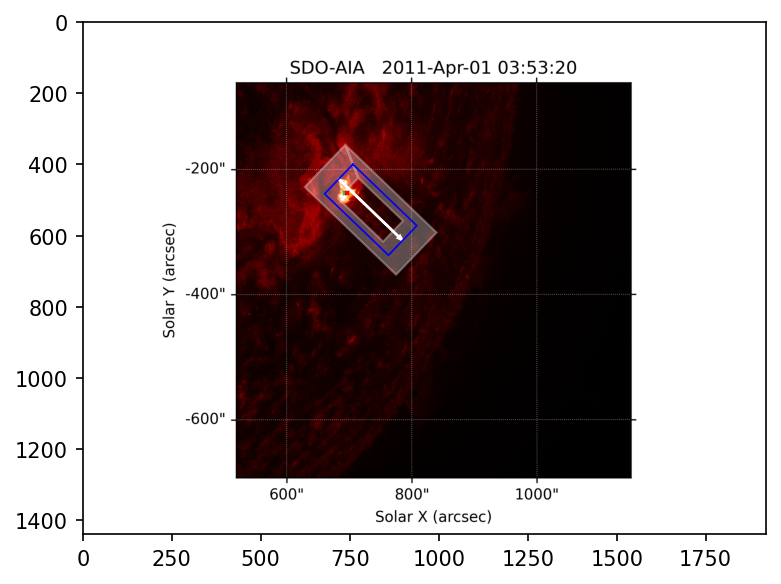

70439154
['ssw_cutout_20110401_035732_aia_304_1616.png']
solar HW 182.2235426749244 54.18626509550181
StartEnd sun [ 699.828 -232.312] [ 697.469 -233.017]
StartEnd [745.82509613 473.8689537 ] [741.68267822 475.11120605]
pairs (array([[681.19352272, 473.00926823],
       [749.27276108, 406.47951162]]), array([[749.27276108, 406.47951162],
       [973.00841481, 635.42598122]]))



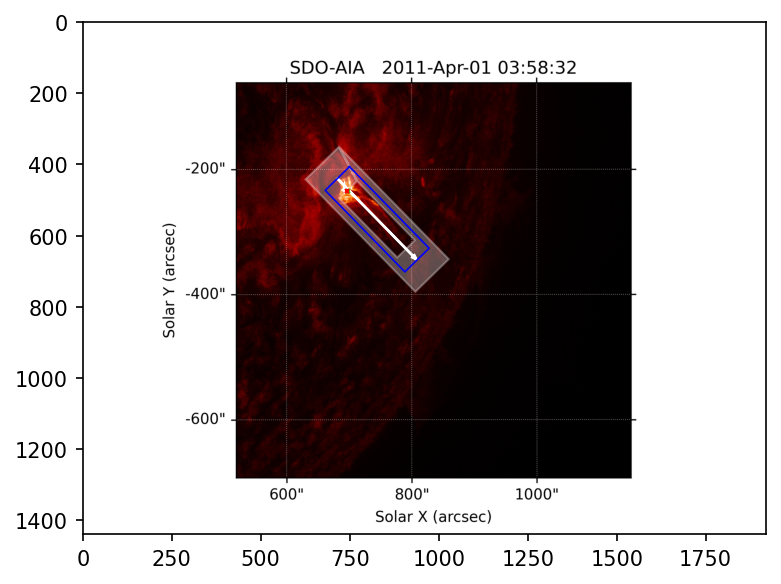

70439155
['ssw_cutout_20110401_040244_aia_304_1629.png']
solar HW 241.54545858285147 53.10464554066805
StartEnd sun [ 694.605 -229.875] [ 697.157 -226.62 ]
StartEnd [736.64685059 469.59608765] [741.12350464 463.87389374]
pairs (array([[684.82213539, 477.23096637],
       [753.33800056, 413.91988813]]), array([[ 753.33800056,  413.91988813],
       [1041.3115181 ,  725.56763206]]))



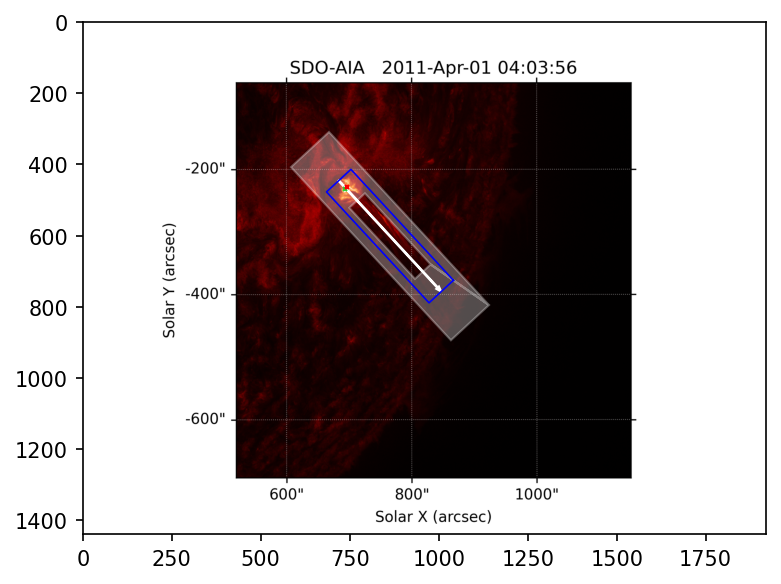

70439156
['ssw_cutout_20110401_040756_aia_304_1642.png']
solar HW 183.58856513955337 61.08905974886176
StartEnd sun [ 702.732 -240.781] [ 700.843 -244.96 ]
StartEnd [743.11986631 483.64939587] [739.841727   490.91722351]
pairs (array([[699.11755005, 509.80868153],
       [780.08010597, 441.08338527]]), array([[780.08010597, 441.08338527],
       [986.6172371 , 684.39661836]]))



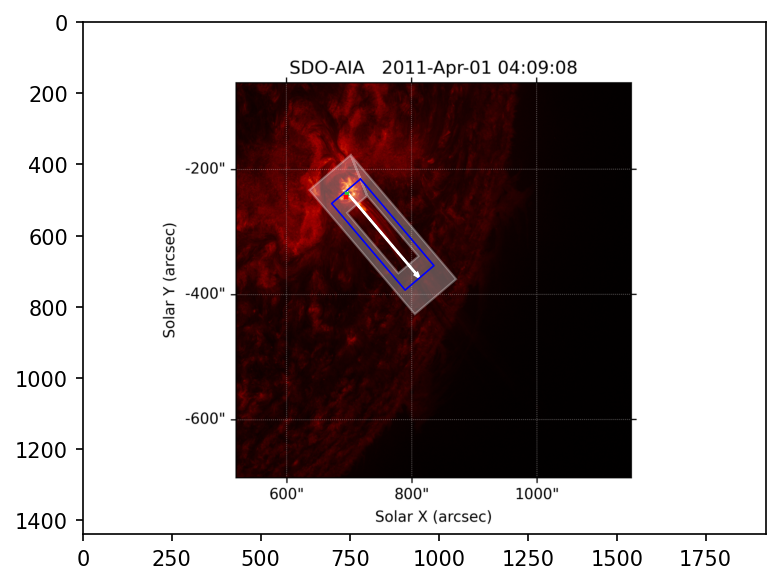

70439157
['ssw_cutout_20110401_041308_aia_304_1655.png']
solar HW 162.28753510051232 154.22849428688593
StartEnd sun [ 751.07 -270.65] [ 748.954 -268.594]
StartEnd [746.68333978 483.25996077] [743.35994846 480.03691003]
pairs (array([[638.70317488, 370.14801242],
       [630.33072874, 611.96180246]]), array([[630.33072874, 611.96180246],
       [884.78177283, 620.7717949 ]]))



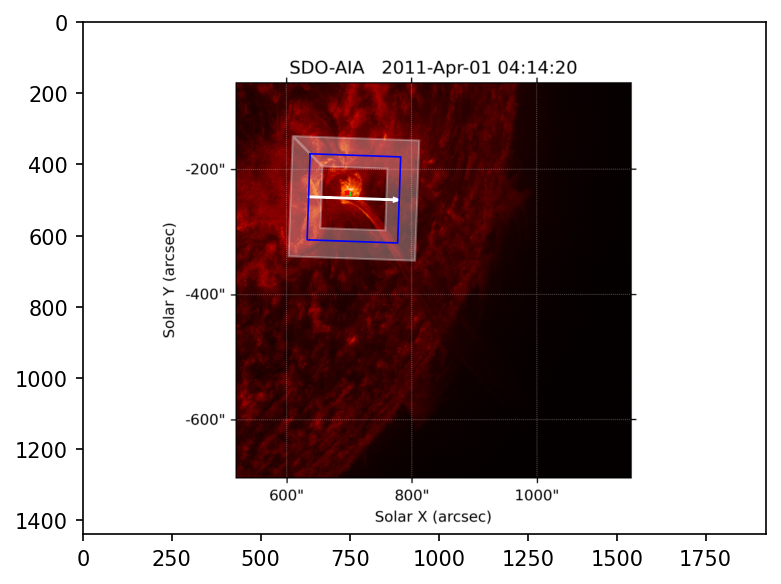

70439158
['ssw_cutout_20110401_041820_aia_304_1668.png']
solar HW 463.2002089809546 413.6241829209216
StartEnd sun [ 780.597 -294.93 ] [ 790.874 -303.766]
StartEnd [739.8484127  486.44707351] [754.90477108 499.36788196]
pairs (array([[ 684.97894814,  456.15012812],
       [1290.49733819,  456.15012812]]), array([[1290.49733819,  456.15012812],
       [1290.49733819, 1134.24651106]]))



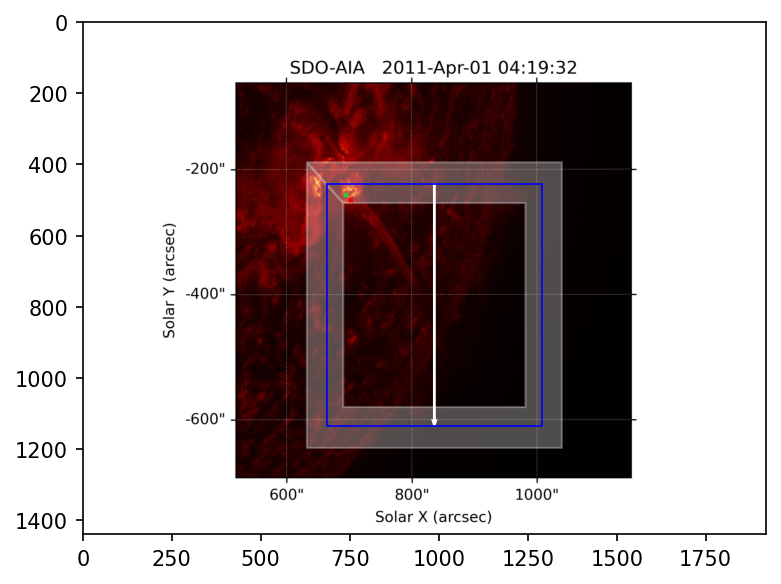

70439159
['ssw_cutout_20110401_042332_aia_304_1681.png']
solar HW 290730.04183618224 404.8281830715347
StartEnd sun [ 843.291 -328.332] [ 2.91479e+05 -2.06822e+02]
StartEnd [731.87392989 471.02625433] [1186.7790936  1055.15153852]
pairs (array([[ 680.56362709,  457.44129807],
       [1202.09335015,  457.44539017]]), array([[1202.09335015,  457.44539017],
       [1202.08831284, 1099.43926801]]))



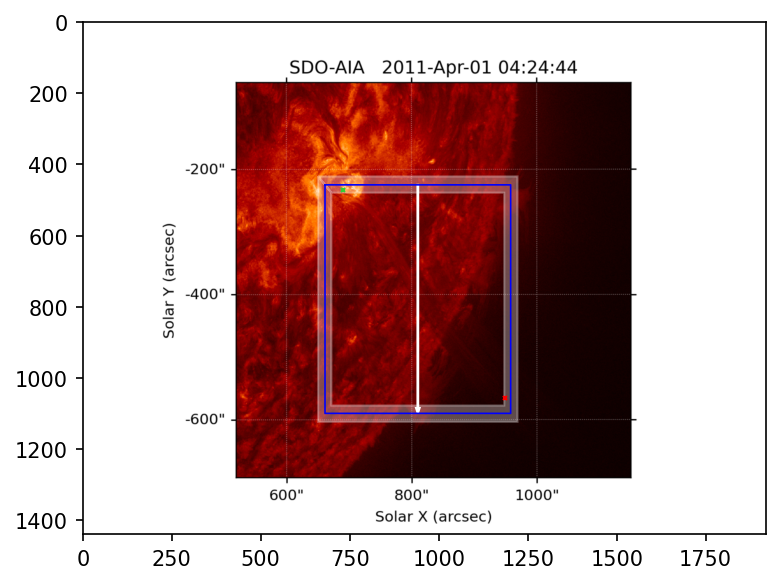

In [74]:
for jet in Jet_clusters[0].jets:
    print(jet.subject)
    print(subject_file[subjects==jet.subject])
    print('solar HW',jet.solar_H,jet.solar_W)
    print('StartEnd sun',jet.solar_start,jet.solar_end)
    print('StartEnd',jet.start,jet.end)
    print('pairs',jet.get_width_height_pairs())
    print('')
    fig, ax = plt.subplots(1, 1, dpi=150)
    ax.imshow(get_subject_image(jet.subject,frame=3))
    jet.plot(ax)
    #ax.axis('off')
    plt.tight_layout()    
#        plt.savefig('myfolder/Jet_'+'_'+str(jet.subject)+'.pdf',dpi=300)
    plt.show()

In [20]:
np.argwhere(subjects==70439154)

array([[149]])

1920.0 1440.0000000000002 0.22375 0.10999999999999999 0.80125 0.88
1920.0 1440.0000000000002
in visual file 0.36449375 1.1613277777777777
0.36449375 1.1613277777777777 1053 1053 0.22375 0.10999999999999999 0.80125 0.88 0.2437121212121212 1.3653607503607503 256.62886363636363 1437.7248701298702
solr outer 674.025 169.706


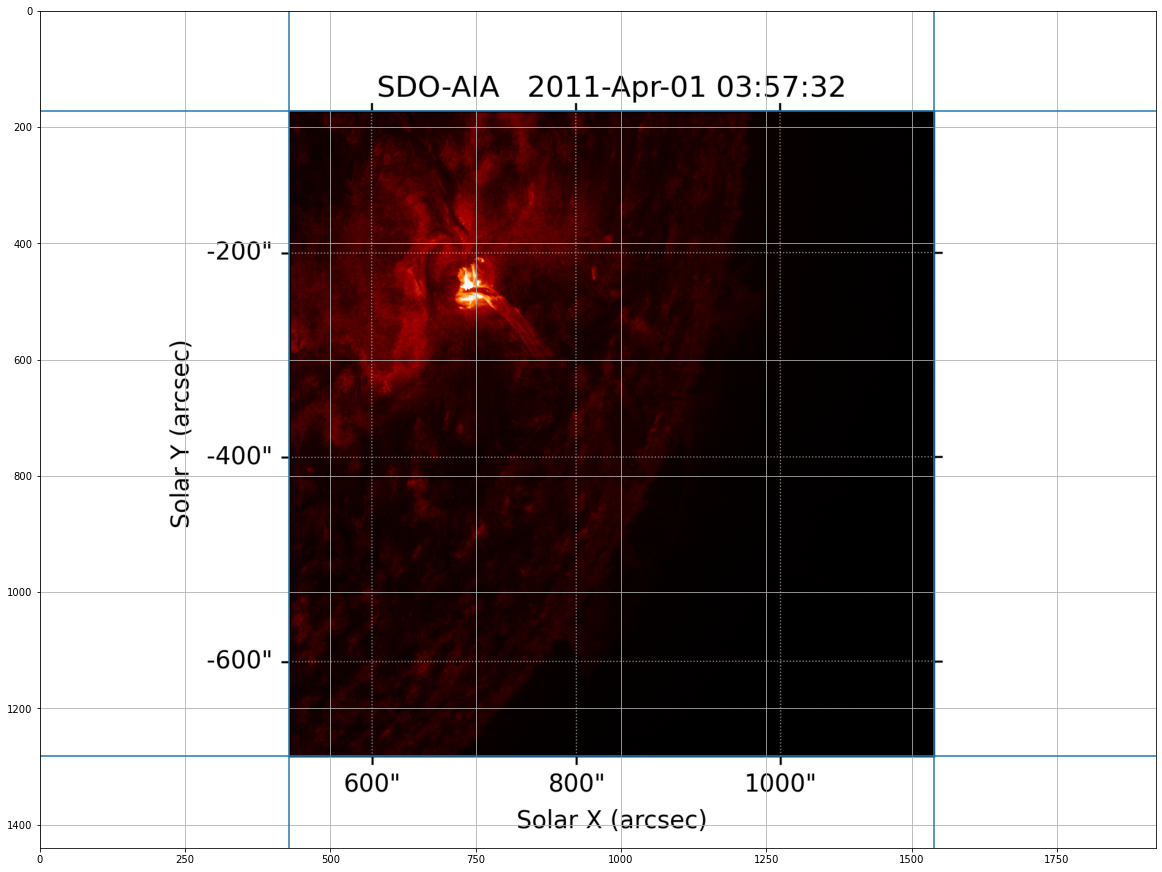

In [25]:
i=149
#50 is very wrong? x -330 y -500
#150 has only Y worng by 350(on -200")
#300 wrong Y by -200 (on -200") 
#print(subject_file[i])

#subject_file='ssw_cutout_20110401_040244_aia_304_1629.png'
vv=Visual_File.select().where(Visual_File.file_name==subject_file[i])
print(vv[0].width,vv[0].height,vv[0].im_ll_x,vv[0].im_ll_y,vv[0].im_ur_x,vv[0].im_ur_y)

plt.figure(figsize=(20,20))
plt.imshow(get_subject_image(subjects[i],frame=0))
plt.grid()
#plt.scatter(1250,400,color='green',s=50)
x,y=699.828, -232.312
Wpix,Hpix=vv[0].width,vv[0].height
print(Wpix,Hpix)
x_sol,y_sol=solar_conversion(subject_file[i],x,y) #50 still worng, 300 correct, 150 correct, 400 corrct, 3000 correct
print('solr outer',x_sol,y_sol) #3910 correct, 2000 correct, 
plt.scatter(x,y)
plt.xlim(0,Wpix)
plt.ylim(Hpix,0)
plt.hlines(Hpix-(vv[0].im_ll_y)*Hpix,0,Wpix) #A lot of them have offset +0.01
plt.hlines(Hpix-(vv[0].im_ur_y)*Hpix,0,Wpix) #+0.01
#im_  _x
plt.vlines(vv[0].im_ll_x*Wpix,0,Hpix) 
plt.vlines(vv[0].im_ur_x*Wpix,0,Hpix)
plt.show()

#fits = vv[0].fits_join.get().fits_file
#header_dict = FileHeader(fits.get_header_as_dict())
#fake_map = Map(np.zeros((1, 1)), header_dict)
#print(header_dict)

In [ ]:
745.82509613 473.8689537

In [43]:
Visual_File.pixel_from_world(10,10)

TypeError: pixel_from_world() missing 1 required positional argument: 'hpc_y'

In [41]:
def pixel_from_world(self, hpc_x, hpc_y, normalized=False):
    """ Get the pixel coordinate from a world coordinate
    """
    fits = self.fits_join.get().fits_file
    header_dict = FileHeader(fits.get_header_as_dict())
    fake_map = Map(np.zeros((1, 1)), header_dict)
    return mp.pixel_from_world(fake_map, self, hpc_x, hpc_y, normalized=normalized)

In [46]:
import solar.common.mapproc as mp
from sunpy.io.header import FileHeader
from sunpy.map import Map

def __world_from_pixel_norm(self, x: float, y: float):
        fits = self.fits_join.get().fits_file
        header_dict = FileHeader(fits.get_header_as_dict())
        print(header_dict)
        fake_map = Map(np.zeros((1, 1)), header_dict)

        return mp.world_from_pixel_norm(fake_map, self, x, y)


In [138]:
__world_from_pixel_norm(vv[0],x, y)
#fake_map = Map(np.zeros((1, 1)), header_dict)
#mp.world_from_pixel_norm(fake_map, vv[0], x, y)

FileHeader([('simple', None), ('bitpix', 16), ('naxis', 2), ('naxis1', 1053), ('naxis2', 1053), ('bld_vers', 'V5R12X'), ('lvl_num', 1.0), ('t_rec', '2011-04-01T03:52:10Z'), ('trecstep', 1.0), ('trecepoc', '1977.01.01_00:00:00_TAI'), ('trecroun', 1), ('origin', 'SDO'), ('date', '2021-10-12T14:58:07'), ('telescop', 'SDO'), ('instrume', 'AIA_4'), ('date-obs', '2011-04-01T03:52:08.12'), ('t_obs', '2011-04-01T03:52:09.57Z'), ('camera', 4), ('img_type', 'LIGHT'), ('exptime', 2.902177), ('expsdev', 0.0002), ('int_time', 3.148438), ('wavelnth', 304), ('waveunit', 'angstrom'), ('wave_str', '304_THIN'), ('fsn', 23367885), ('fid', 0), ('quallev0', 0), ('quality', 0), ('totvals', 16777216), ('datavals', 16777216), ('missvals', 0), ('percentd', 100.0), ('datamin', -8), ('datamax', 16383), ('datamedn', 30), ('datamean', 48.25), ('datarms', 100.03), ('dataskew', 64.58), ('datakurt', 8968.16), ('datacent', 68.25), ('datap01', -1.0), ('datap10', 1.0), ('datap25', 3.0), ('datap75', 71.0), ('datap90', 11

<SkyCoord (Helioprojective: obstime=2011-04-01T03:52:08.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-04-01T03:52:08.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00770256, -6.56814071, 1.4949738e+11)>): (Tx, Ty) in arcsec
    (249688.48232647, 195978.94278418)>

,#file_name_0,#file_name_1,#file_name_2,#file_name_3,#file_name_4,#file_name_5,#file_name_6,#file_name_7,#file_name_8,#file_name_9,...,#fits_header_5,#fits_header_6,#fits_header_7,#fits_header_8,#fits_header_9,#fits_header_10,#fits_header_11,#fits_header_12,#fits_header_13,#fits_header_14
126,ssw_cutout_20110401_040244_aia_304_1629.png,ssw_cutout_20110401_040308_aia_304_1630.png,ssw_cutout_20110401_040332_aia_304_1631.png,ssw_cutout_20110401_040356_aia_304_1632.png,ssw_cutout_20110401_040420_aia_304_1633.png,ssw_cutout_20110401_040444_aia_304_1634.png,ssw_cutout_20110401_040508_aia_304_1635.png,ssw_cutout_20110401_040532_aia_304_1636.png,ssw_cutout_20110401_040556_aia_304_1637.png,ssw_cutout_20110401_040620_aia_304_1638.png,...,"{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na...","{""simple"": null, ""bitpix"": 16, ""naxis"": 2, ""na..."


In [185]:
fake_map = Map(np.zeros((1, 1)), res)
wc=mp.world_from_pixel_norm(fake_map, vv[0], x, y)
#wc = Visual_File.world_from_pixel(vv[0], float(x), float(y))
solar_x,solar_y = wc.Tx,wc.Ty
x_sun=str(solar_x).split('arcsec')[0]
y_sun=str(solar_y).split('arcsec')[0]
print(float(x_sun),float(y_sun))

249688.0 195979.0


In [113]:
#FileHeader(fits.get_header_as_dict())
from solar.database.tables.fits_file import Fits_File

#{x.key: x.value for x in Fits_File.fits_keys}
D=line.split(',"')[-1][:-2].replace('""','"')
print(D)

{"simple": null, "bitpix": 16, "naxis": 2, "naxis1": 1167, "naxis2": 1252, "bld_vers": "V5R12X", "lvl_num": 1.0, "t_rec": "2011-03-20T00:40:10Z", "trecstep": 1.0, "trecepoc": "1977.01.01_00:00:00_TAI", "trecroun": 1, "origin": "SDO", "date": "2021-10-12T14:50:32", "telescop": "SDO", "instrume": "AIA_4", "date-obs": "2011-03-20T00:40:08.12", "t_obs": "2011-03-20T00:40:09.57Z", "camera": 4, "img_type": "LIGHT", "exptime": 2.902162, "expsdev": 0.000204, "int_time": 3.148438, "wavelnth": 304, "waveunit": "angstrom", "wave_str": "304_THIN", "fsn": 22675079, "fid": 0, "quallev0": 0, "quality": 0, "totvals": 16777216, "datavals": 16777216, "missvals": 0, "percentd": 100.0, "datamin": -8, "datamax": 3109, "datamedn": 31, "datamean": 42.21, "datarms": 53.82, "dataskew": 4.54, "datakurt": 58.73, "datacent": 77.75, "datap01": -1.0, "datap10": 1.0, "datap25": 3.0, "datap75": 69.0, "datap90": 100.0, "datap95": 125.0, "datap98": 167.0, "datap99": 211.0, "nsatpix": 0, "oscnmean": "nan", "oscnrms": "n

True

In [452]:
from sunpy.map import Map, GenericMap
import pandas as pd
import sys 

sub_file='ssw_cutout_20110401_040244_aia_304_1629.png'
frame=0
x,y=750,400
data = pd.read_csv('meta_2011.csv',index_col=False)
cond=data[f'#file_name_{frame}']==sub_file
if len(data[cond])<1:
    print('image not found')
    sys.exit()
t=np.where(cond)[0][0]
image_data=data.iloc[t]
header_dict=json.loads(data[f'#fits_header_{frame}'][t])
header_dict

{'simple': None,
 'bitpix': 16,
 'naxis': 2,
 'naxis1': 1053,
 'naxis2': 1053,
 'bld_vers': 'V5R12X',
 'lvl_num': 1.0,
 't_rec': '2011-04-01T04:02:46Z',
 'trecstep': 1.0,
 'trecepoc': '1977.01.01_00:00:00_TAI',
 'trecroun': 1,
 'origin': 'SDO',
 'date': '2021-10-12T14:58:07',
 'telescop': 'SDO',
 'instrume': 'AIA_4',
 'date-obs': '2011-04-01T04:02:44.12',
 't_obs': '2011-04-01T04:02:45.57Z',
 'camera': 4,
 'img_type': 'LIGHT',
 'exptime': 2.902178,
 'expsdev': 0.000199,
 'int_time': 3.148438,
 'wavelnth': 304,
 'waveunit': 'angstrom',
 'wave_str': '304_THIN',
 'fsn': 23368309,
 'fid': 0,
 'quallev0': 0,
 'quality': 0,
 'totvals': 16777216,
 'datavals': 16777216,
 'missvals': 0,
 'percentd': 100.0,
 'datamin': -7,
 'datamax': 16383,
 'datamedn': 30,
 'datamean': 48.4,
 'datarms': 99.08,
 'dataskew': 63.93,
 'datakurt': 8929.16,
 'datacent': 67.02,
 'datap01': -1.0,
 'datap10': 1.0,
 'datap25': 3.0,
 'datap75': 71.0,
 'datap90': 114.0,
 'datap95': 159.0,
 'datap98': 240.0,
 'datap99': 31

In [66]:
header_dict['naxis1']

1053

In [69]:
data['#im_ll_x']

0       0.243497
1       0.243497
2       0.243354
3       0.243497
4       0.243497
          ...   
1814    0.125000
1815    0.125000
1816    0.125000
1817    0.125000
1818    0.125000
Name: #im_ll_x, Length: 1819, dtype: float64

In [44]:
def world_from_pixel(sunmap, image_data, x: float, y: float):
    """Function world_from_pixel_norm: Get a world pixel from a pixel coordinate.
    Here x and y are given in normalized coordinates with the origin being the bottom left

    :param sunmap: The map containing the WCS data
    :type sunmap: sunpy.map.GenericMap
    :param image_data: The structure containing data about the image
    :type image_data: Visual_File or Subclass of Base_Visual
    :param x: x normalized image coordinate
    :type x: float
    :param y: y normalized image coordinate
    :type y: float
    :returns: The resulting coordinates
    :type return: Sunpy coordinate object
    """
#    sunmap = get_map(sunmap)

    fits_width = sunmap.meta["naxis1"]
    fits_height = sunmap.meta["naxis2"]
    
    #get the image white spaces
    im_width = image_data['#width']
    im_height = image_data['#height']
    im_ll_x = image_data['#im_ll_x']
    im_ll_y = image_data['#im_ll_y']
    im_ur_x = image_data['#im_ur_x']
    im_ur_y = image_data['#im_ur_y']
    
    #The pixel coordinate has an Inverted y axis by convention so this allows for the orgin to be in the bottom left corner again
    y=im_height-y
    
    #Normalise the coordinates
    x_norm = x/im_width
    y_norm = y/im_height

    axis_x_normalized = (x - im_ll_x) / (im_ur_x - im_ll_x)
    axis_y_normalized = (y - im_ll_y) / (im_ur_y - im_ll_y)

    pix_x = axis_x_normalized * fits_width
    pix_y = (axis_y_normalized) * fits_height
    
    print(x,y,fits_width,fits_height,im_ll_x,im_ll_y,im_ur_x,im_ur_y,axis_x_normalized,axis_y_normalized,pix_x,pix_y)

    return sunmap.pixel_to_world(pix_x * u.pix, pix_y * u.pix)

In [ ]:
StartEnd sun [ 694.605 -229.875] [ 697.157 -226.62 ]
StartEnd [736.64685059 469.59608765] [741.12350464 463.87389374]
0.3617734375 1.1596354166666667 1053 1053 0.22375 0.10999999999999999 0.80125 0.88 0.2390016233766234 1.3631628787878


70439153
['ssw_cutout_20110401_035208_aia_304_1603.png']
solar HW 141.66754851058872 65.4237827246331
StartEnd sun [ 693.845 -235.259] [ 697.557 -235.566]
StartEnd [735.32128906 479.05276489] [741.84349476 479.58585982]
pairs (array([[679.33795609, 482.67578294],
       [758.94546054, 399.78202004]]), array([[758.94546054, 399.78202004],
       [938.44436545, 572.16483115]]))



In [77]:
from sunpy.map import Map, GenericMap
import pandas as pd
import sys 
import astropy.units as u
import json

path_old='/Users/pjol/SolarJets-1/BoxTheJets/'
os.chdir(path_old)

subject_file='ssw_cutout_20110401_035208_aia_304_1603.png'
frame=0
x,y=735.32128906, 479.05276489
data = pd.read_csv('meta_2011.csv',index_col=False)
cond=data[f'#file_name_{frame}']==subject_file
if len(data[cond])<1:
    print('image not found')
    sys.exit()
t=np.where(cond)[0][0]
image_data=data.iloc[t]
header_dict=json.loads(data[f'#fits_header_{frame}'][t])

print('0.3617734375 1.1596354166666667 1053 1053 0.22375 0.10999999999999999 0.80125 0.88 0.2390016233766234 1.363162878787879 251.66870941558443 1435.4105113636365')

fake_map = Map(np.zeros((1, 1)), header_dict)
world_from_pixel_norm(sunmap=fake_map, image_data=image_data, x=x, y=y)
#all same values for map, dictionary and image values so what else?

0.3617734375 1.1596354166666667 1053 1053 0.22375 0.10999999999999999 0.80125 0.88 0.2390016233766234 1.363162878787879 251.66870941558443 1435.4105113636365
0.38297983805208335 0.667324468826389 1053 1053 0.22375 0.1099999999999999 0.80125 0.88 0.2757226632936508 0.7237980114628428 290.33596444821427 762.1593060703735


<SkyCoord (Helioprojective: obstime=2011-04-01T03:52:08.120, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-04-01T03:52:08.120, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00770256, -6.56814071, 1.4949738e+11)>): (Tx, Ty) in arcsec
    (693.84492696, -235.25931193)>

In [84]:
def world_from_pixel(sunmap, image_data, x: float, y: float):
    """Function world_from_pixel_norm: Get a world pixel from a pixel coordinate.
    Here x and y are given in normalized coordinates with the origin being the bottom left

    :param sunmap: The map containing the WCS data
    :type sunmap: sunpy.map.GenericMap
    :param image_data: The structure containing data about the image
    :type image_data: Visual_File or Subclass of Base_Visual
    :param x: x normalized image coordinate
    :type x: float
    :param y: y normalized image coordinate
    :type y: float
    :returns: The resulting coordinates
    :type return: Sunpy coordinate object
    """
#    sunmap = get_map(sunmap)

    fits_width = sunmap.meta["naxis1"]
    fits_height = sunmap.meta["naxis2"]
    
    #get the image white spaces
    im_width = image_data['#width']
    im_height = image_data['#height']
    im_ll_x = image_data['#im_ll_x']
    im_ll_y = image_data['#im_ll_y']
    im_ur_x = image_data['#im_ur_x']
    im_ur_y = image_data['#im_ur_y']
    
    #The pixel coordinate has an Inverted y axis by convention so this allows for the orgin to be in the bottom left corner again
    y=im_height-y
    
    #Normalise the coordinates
    x_norm = x/im_width
    y_norm = y/im_height

    axis_x_normalized = (x_norm - im_ll_x) / (im_ur_x - im_ll_x)
    axis_y_normalized = (y_norm - im_ll_y) / (im_ur_y - im_ll_y)

    pix_x = axis_x_normalized * fits_width
    pix_y = (axis_y_normalized) * fits_height
    
    print(x,y,fits_width,fits_height,im_ll_x,im_ll_y,im_ur_x,im_ur_y,axis_x_normalized,axis_y_normalized,pix_x,pix_y)

    return sunmap.pixel_to_world(pix_x * u.pix, pix_y * u.pix)

def get_meta_data(file,meta_file,frame=0):
    data = pd.read_csv(meta_file,index_col=False)
    cond=data[f'#file_name_{frame}']==subject_file
    if len(data[cond])<1:
        print('image not found, please check spelling on the subject file and the meta data file')
        sys.exit()
    t=np.where(cond)[0][0]
    image_data=data.iloc[t]
    header_dict=json.loads(data[f'#fits_header_{frame}'][t])
    fake_map = Map(np.zeros((1, 1)), header_dict)
    return fake_map,image_data


def solar_conversion(file,meta_file,x,y,frame=0,plot=True):
    fake_map,image_data = get_meta_data(file,meta_file)
    
    if plot==True:
        #file=pd.read_csv('configs/subject_scales.csv')
        #cond=file['subject_id']==subject_plot
        #scale=file['frame_3_scale'][cond]
        plt.figure(figsize=(20,20))
        plt.imshow(get_subject_image(subject_plot,frame=3))
        plt.grid()

        Wpix,Hpix=image_data['#width'],image_data['#height']
        plt.scatter(x,y)
        plt.xlim(0,Wpix)
        plt.ylim(Hpix,0)
        plt.hlines(Hpix-(image_data['#im_ll_y'])*Hpix,0,Wpix) #A lot of them have offset +0.01
        plt.hlines(Hpix-(image_data['#im_ur_y'])*Hpix,0,Wpix) #+0.01
        #im_  _x
        plt.vlines(image_data['#im_ll_x']*Wpix,0,Hpix) 
        plt.vlines(image_data['#im_ur_x']*Wpix,0,Hpix)
        plt.show()
    
    
    x_pix,y_pix=x,y
    wc = world_from_pixel(fake_map, image_data, float(x_pix), float(y_pix))
    solar_x,solar_y = wc.Tx,wc.Ty
    x_sun=str(solar_x).split('arcsec')[0]
    y_sun=str(solar_y).split('arcsec')[0]
    return float(x_sun),float(y_sun)



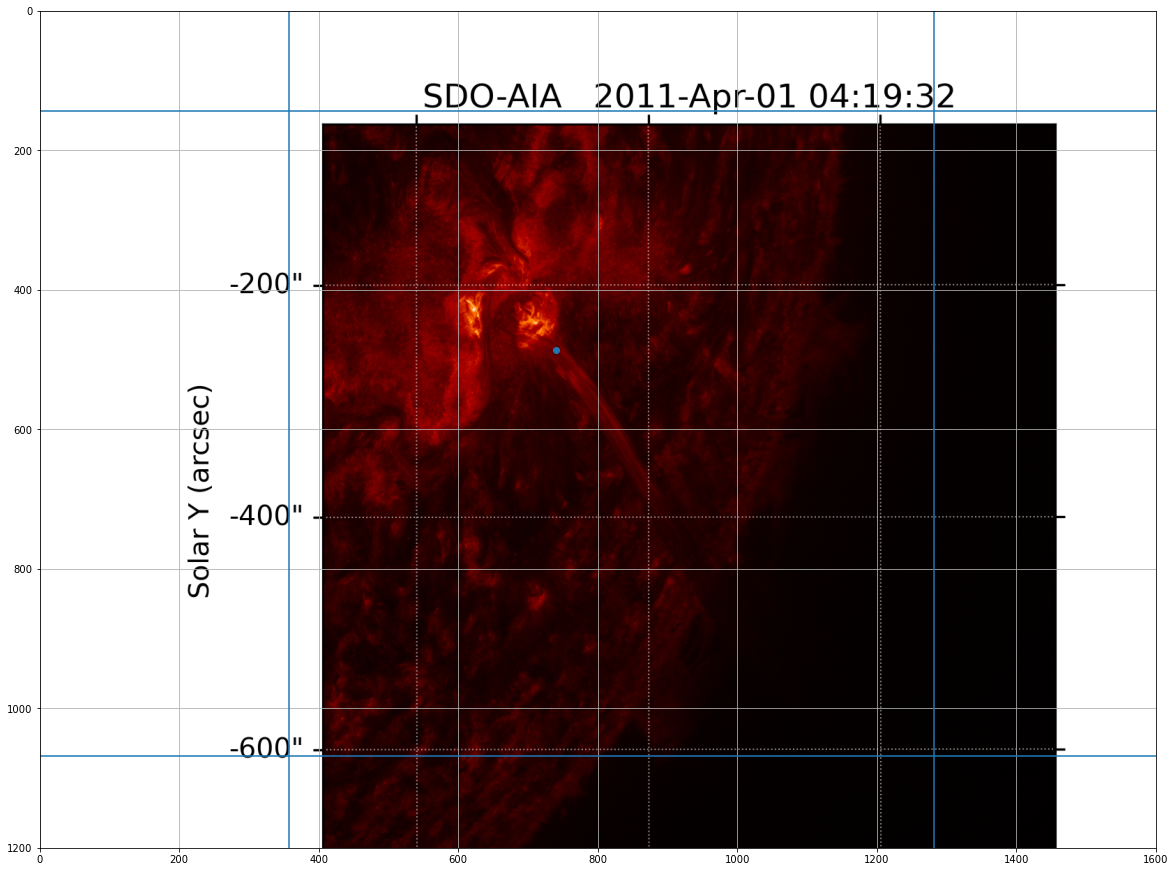

739.8484127 713.55292649 1053 1053 0.22375 0.1099999999999999 0.80125 0.88 0.41325585790043295 0.6293862840800867 435.1584183691559 662.7437571363313
780.597 -294.93


In [87]:
from sunpy.map import Map, GenericMap
import pandas as pd
import sys 
import astropy.units as u
import json


subject_file='ssw_cutout_20110401_041820_aia_304_1668.png'

meta_file='meta_2011.csv'
frame=0
x,y=739.8484127,  486.44707351
subject_plot=70439158
x_sun,y_sun=solar_conversion(subject_file,meta_file,x,y)
print(x_sun,y_sun)


In [43]:
plt.figure(figsize=(20,20))
plt.imshow(get_subject_image(subjects[i],frame=0))
plt.grid()

Wpix,Hpix=vv[0].width,vv[0].height
plt.scatter(x,y)
plt.xlim(0,Wpix)
plt.ylim(Hpix,0)
plt.hlines(Hpix-(vv[0].im_ll_y)*Hpix,0,Wpix) #A lot of them have offset +0.01
plt.hlines(Hpix-(vv[0].im_ur_y)*Hpix,0,Wpix) #+0.01
#im_  _x
plt.vlines(vv[0].im_ll_x*Wpix,0,Hpix) 
plt.vlines(vv[0].im_ur_x*Wpix,0,Hpix)
plt.show()

(array([123, 124]), array([13,  0]))


In [86]:
from PIL import Image
from panoptes_client import Panoptes, Subject
from skimage import io, transform

def get_subject_image(subject, frame=7):
    '''
        Fetch the subject image from Panoptes (Zooniverse database)

        Inputs
        ------
        subject : int
            Zooniverse subject ID
        frame : int
            Frame to extract (between 0-14, default 7)

        Outputs
        -------
        img : numpy.ndarray
            RGB image corresponding to `frame`
    '''
    # get the subject metadata from Panoptes
    subjecti = Subject(int(subject))
    try:
        frame0_url = subjecti.raw['locations'][frame]['image/png']
    except KeyError:
        frame0_url = subjecti.raw['locations'][frame]['image/jpeg']

    img = io.imread(frame0_url)

    # for subjects that have an odd size, resize them
    #if img.shape[0] != 1920:
    #    img = transform.resize(img, (1440, 1920))

    return img

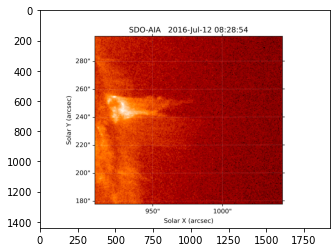

In [91]:
plt.imshow(get_subject_image(74749113))